In [5]:
import os
from scipy.io import loadmat

data = loadmat('leukemia.mat')
X= data["leukemia"]
print(X.shape)


(50, 72)


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD, PCA
from mpl_toolkits.mplot3d import Axes3D

svd = TruncatedSVD(n_components=10)  # Extract first 10 components for analysis
X_svd = svd.fit_transform(X)



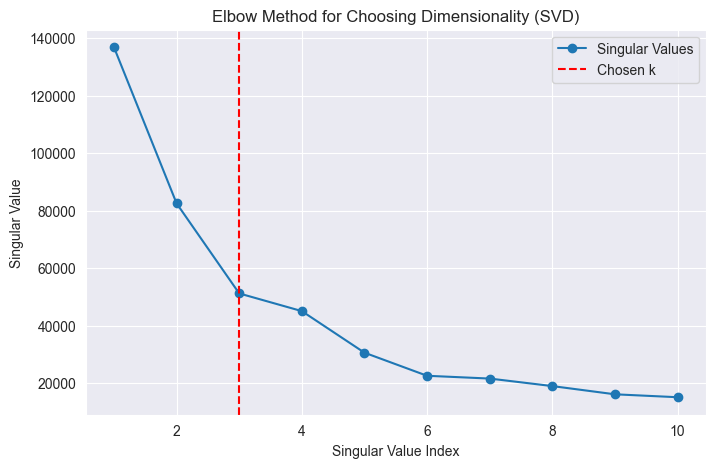

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(svd.singular_values_) + 1), svd.singular_values_, 'o-', markersize=6, label="Singular Values")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Value")
plt.title("Elbow Method for Choosing Dimensionality (SVD)")
plt.axvline(x=3, color='r', linestyle="--", label="Chosen k")
plt.legend()
plt.grid(True)
plt.show()

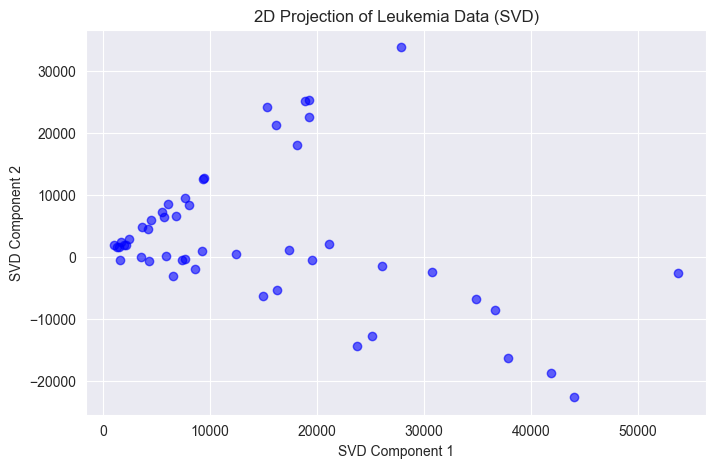

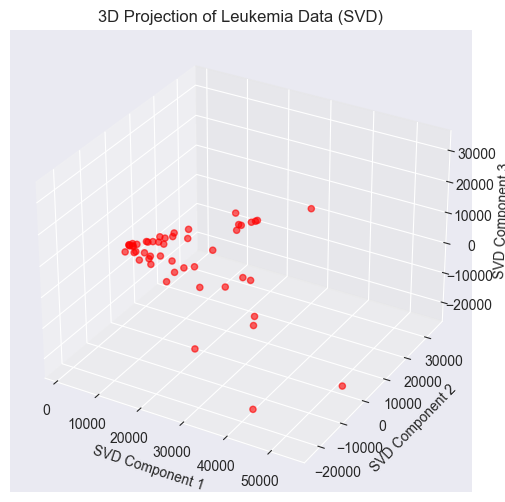

In [18]:
plt.figure(figsize=(8, 5))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c='blue', alpha=0.6)
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.title("2D Projection of Leukemia Data (SVD)")
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_svd[:, 0], X_svd[:, 1], X_svd[:, 2], c='red', alpha=0.6)
ax.set_xlabel("SVD Component 1")
ax.set_ylabel("SVD Component 2")
ax.set_zlabel("SVD Component 3")
ax.set_title("3D Projection of Leukemia Data (SVD)")
plt.show()

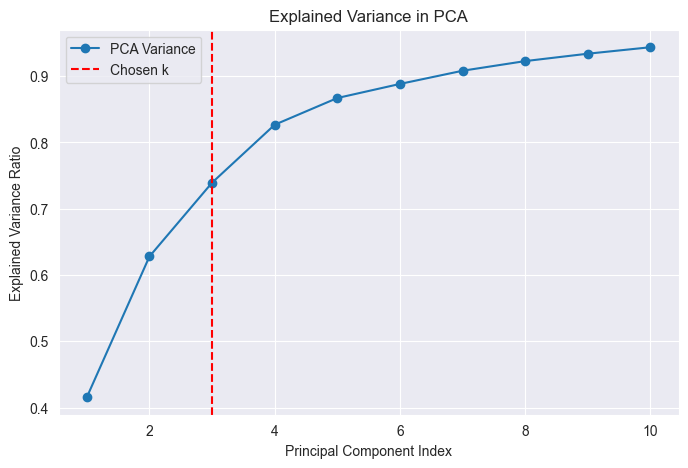

In [23]:
# Step 5: Perform PCA (Covariance-Based)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

pca_variance_sum = np.cumsum(pca.explained_variance_ratio_)

# Step 6: Compare PCA and SVD (Explained Variance)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca_variance_sum, 'o-', markersize=6, label="PCA Variance")
plt.xlabel("Principal Component Index")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance in PCA")
plt.axvline(x=3, color='r', linestyle="--", label="Chosen k")
plt.legend()
plt.grid(True)
plt.show()

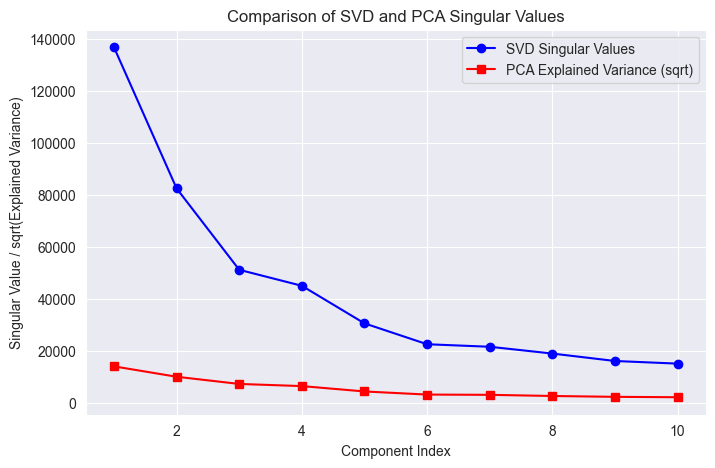

In [25]:
# Compare Singular Values from SVD and Explained Variance from PCA
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(svd.singular_values_) + 1), svd.singular_values_, 'o-', label="SVD Singular Values", color='blue')
plt.plot(range(1, len(pca.explained_variance_) + 1), np.sqrt(pca.explained_variance_), 's-', label="PCA Explained Variance (sqrt)", color='red')
plt.xlabel("Component Index")
plt.ylabel("Singular Value / sqrt(Explained Variance)")
plt.title("Comparison of SVD and PCA Singular Values")
plt.legend()
plt.grid(True)
plt.show()


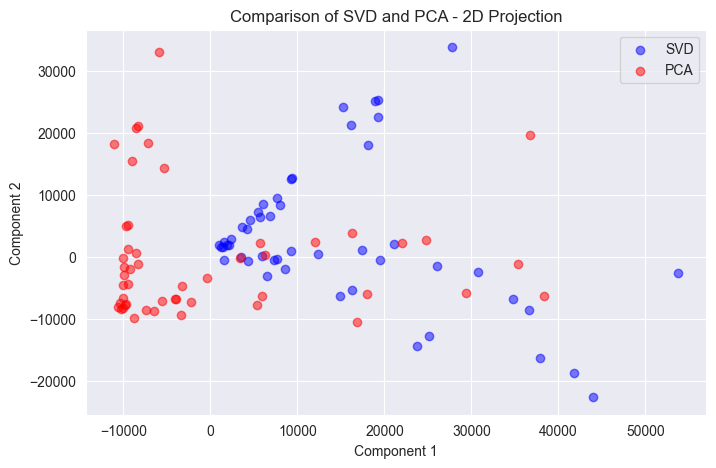

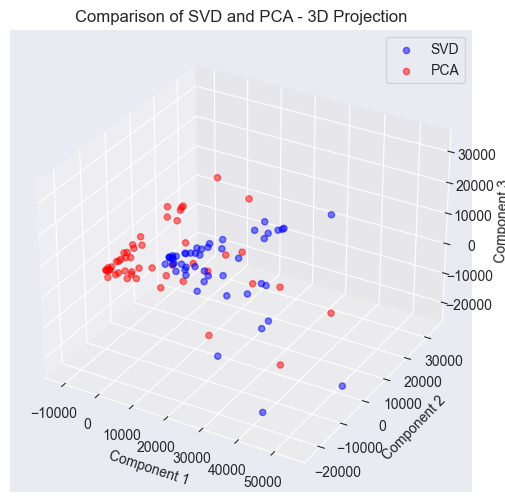

In [27]:
plt.figure(figsize=(8, 5))
plt.scatter(X_svd[:, 0], X_svd[:, 1], label="SVD", alpha=0.5, color='blue')
plt.scatter(X_pca[:, 0], X_pca[:, 1], label="PCA", alpha=0.5, color='red')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Comparison of SVD and PCA - 2D Projection")
plt.legend()
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_svd[:, 0], X_svd[:, 1], X_svd[:, 2], label="SVD", alpha=0.5, color='blue')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], label="PCA", alpha=0.5, color='red')
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
ax.set_title("Comparison of SVD and PCA - 3D Projection")
ax.legend()
plt.show()
